# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [ ]:
## Business Understanding

# The Business Understanding phase focuses on understanding the objectives and requirements of the project.
# The project objective is to identify the key factors that drives used car prices, and the criteria 
# of the business success is to provide clear recommendations to a used car dealership.


In [ ]:
# Achieving this objective requires applying the CRISP-DM reference model to the available resources, in this case the 
# used car dataset. From a data mining perspective, the data mining project definition means to build a model 
# that can be used by used car dealership to predict the used car price based on key factors identified. This helps 
# the establishment of a strong business understanding which is essential for business winning.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
## Data Understanding

# The data understanding has a close link with Business Understanding. This phase starts with an initial 
# data proceeds in order to get familiar with the data, to iiscover first insights into the data, or to 
# detect interesting subsets to form hypotheses. 

# After I explored the dataset, I found that that many data columns have missing items. 
# Some of the rows can be dropped if the number of missing items are relatively smaller, but if a
# column contains too many missing items, dropping every rows would significantly reduce the size
# of the dataset which makes the analysis not as accurate as it should be.

# Based on these findings, I decide to adopt a strategy of multi-steps. The first step is to handle the 
# missing items in several of the columns. The second step is to encode some of categorical column into 
# numeric ones. The last step is to drop some columns that carries information that are not related to 
# the prediction of the used car price.

# One final thought is that this dataset is not time series data because it does not carry a sequence of data points 
# indexed in time order. Because these data points does not consist of successive measurements made from 
# the same source over a fixed time interval, so they can't be used to track change over time.

In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

In [114]:
used_car = pd.read_csv('data/vehicles.csv')

In [115]:
used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [116]:
## Data Preparation

# Use multiple steps for data preparation as the below.
# In column of 'price', remove rows with '0' value
used_car = used_car[(used_car['price'] > 0)]

In [117]:
# In columns of 'year', 'manufacturer', 'model', 'condition', 'fuel', 'odometer', 'title_status', 'transmission', 
# remove rows that are empty
columns = ['year', 'manufacturer', 'model', 'condition', 'fuel', 'odometer', 'title_status', 'transmission']
used_car = used_car.dropna(subset=columns)

In [118]:
# In colums of 'cylinders', 'drive', 'type', 'size', 'paint_color', replace the empty items to "Unkown"
used_car[['cylinders', 'drive', 'type', 'size', 'paint_color']] = used_car[['cylinders', 'drive', 'type', 'size', 'paint_color']].fillna("Unknown")

In [119]:
# Select columns of interst 
used_car_int = used_car[['price', 'year', 'manufacturer', 'model', 'condition', 'odometer', 'transmission', 'size']]

# Drop rows that contains NAN value
used_car_final = used_car_int.dropna()

used_car_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223077 entries, 27 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         223077 non-null  int64  
 1   year          223077 non-null  float64
 2   manufacturer  223077 non-null  object 
 3   model         223077 non-null  object 
 4   condition     223077 non-null  object 
 5   odometer      223077 non-null  float64
 6   transmission  223077 non-null  object 
 7   size          223077 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.3+ MB


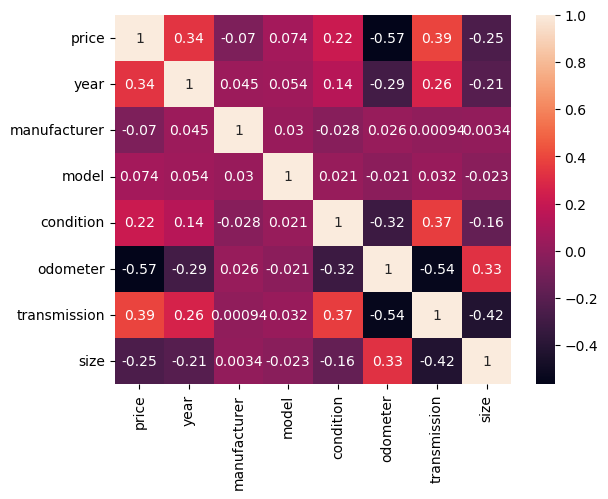

In [120]:
# Use LabelEncoder to encode columns from non-numerical to numerical values
le = preprocessing.LabelEncoder()

# Encode labels of multiple columns at once
cols = ['manufacturer', 'model', 'condition', 'transmission', 'size']

used_car_final[cols] = used_car_final[cols].apply(le.fit_transform)

# Remove unrealistic data such as price is over million dollars
mask = (used_car_final < 150000).all(1)
used_car_final = used_car_final.loc[mask]

# Check correlation of the final data of used car 
ax = sns.heatmap(used_car_final.corr(), annot=True)

fig = ax.get_figure()
fig.savefig("images/used_car_p1.png")

# The heatmap shows that the top 6 features that are closely correlated with ‘price’ are ‘odometer’, 
# ‘transmission’, ‘year’, ‘size’, ‘condition’ and ‘model’.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [121]:
# Firstly, I performed the linear regression model using six features of 'year', 'manufacturer', 
# 'condition', 'odometer', 'model', 'size' to predict 'price'
lr = LinearRegression(fit_intercept = False)
lr_features = lr.fit(used_car_final[['year', 'model', 'condition', 'odometer', 'transmission', 'size']], used_car_final['price'])

predict = lr_features.predict(used_car_final[['year', 'model', 'condition', 'odometer', 'transmission', 'size']])

mse_lr = mean_squared_error(used_car_final['price'], predict)
mae_lr = mean_absolute_error(used_car_final['price'], predict)

print(f'LinearRegression model using six features:')
print(f'MSE: {mse_lr: .2f}')
print(f'MAE: {mae_lr: .2f}')

LinearRegression model using six features:
MSE:  119940147.16
MAE:  7891.38


In [122]:
# Secondly, I performed Pipeline() with PolynomialFeatures model degree=3 and Ridge model, still using sixe features of 
# ''year', 'model', 'condition', 'odometer', 'transmission', 'size' to predict 'price'
pipe = Pipeline([
    ('p_features', PolynomialFeatures(degree=3, include_bias = False)),
    ('ridge', Ridge(alpha=10))])

X = used_car_final[['year', 'model', 'condition', 'odometer', 'transmission', 'size']]
y = used_car_final['price']
pipe.fit(X, y)

mse_pipe = mean_squared_error(pipe.predict(X), y)
mae_pipe = mean_absolute_error(pipe.predict(X), y)

print(f'Pipeline() with PolynomialFeatures model degree=3 and Ridge model:')
print(f'MSE: {mse_pipe: .2f}')
print(f'MAE: {mae_pipe: .2f}')

# The resule shows that Ridge() model produces smaller MSE and MAE values than the Linear Regression above

C:\Users\xinli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.3742e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline() with PolynomialFeatures model degree=3 and Ridge model:
MSE:  101531002.95
MAE:  7085.01


In [123]:
# Finally, split data into training and testing for cross-validation
X_train, X_test, y_train, y_test = train_test_split(used_car_final[['year', 'model', 'condition', 'odometer', 'transmission', 'size']], used_car_final['price'], test_size=0.3, random_state = 32)

train_mses = []
test_mses = []

# Find the best degree value
for k in range(1, 8):
    pipe = Pipeline([('poly_features', PolynomialFeatures(degree = k, include_bias = False)), 
                         ('ridge', Ridge(alpha=10))])    

    pipe.fit(X_train, y_train)
    
    train_mses.append(float(mean_squared_error(pipe.predict(X_train), y_train)))
    test_mses.append(float(mean_squared_error(pipe.predict(X_test), y_test)))
    
best_model_complexity = test_mses.index(min(test_mses)) + 1


C:\Users\xinli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.81916e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\xinli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.08277e-35): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\xinli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.75922e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


The Complexity that minimized Test Error was: 4


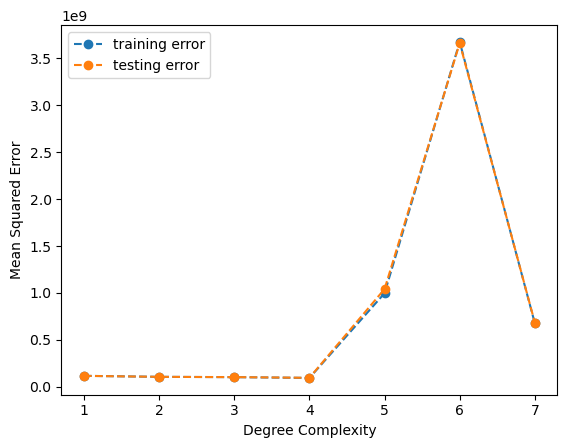

In [124]:
# Create the plot for degree complexity
print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
plt.plot(range(1, 8), train_mses, '--o', label = 'training error')
plt.plot(range(1, 8), test_mses, '--o', label = 'testing error')
plt.xticks(range(1, 8), range(1, 8))
plt.xlabel('Degree Complexity')
plt.ylabel('Mean Squared Error')
plt.legend();
plt.savefig('images/used_car_p2.png')

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [125]:
# Apply the best model for fitting
best_model = Pipeline([('poly_features', PolynomialFeatures(degree = 4, include_bias = False)), 
                         ('ridge', Ridge(alpha=10))])

best_model.fit(X_train, y_train) 

best_model.score(X_test, y_test)

C:\Users\xinli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.75922e-45): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


0.48186594433247854

In [129]:
# Find out the permutation importance
r = permutation_importance(best_model, X_test, y_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<5}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

year 0.298 +/- 0.003
odometer0.193 +/- 0.003
size 0.088 +/- 0.002
transmission0.085 +/- 0.001
condition0.034 +/- 0.001
model0.022 +/- 0.001


In [127]:
# The permutation importance shows the top 5 features that drives used car price are 'year', 'odometer',
# 'size','transmission' and 'condition'.

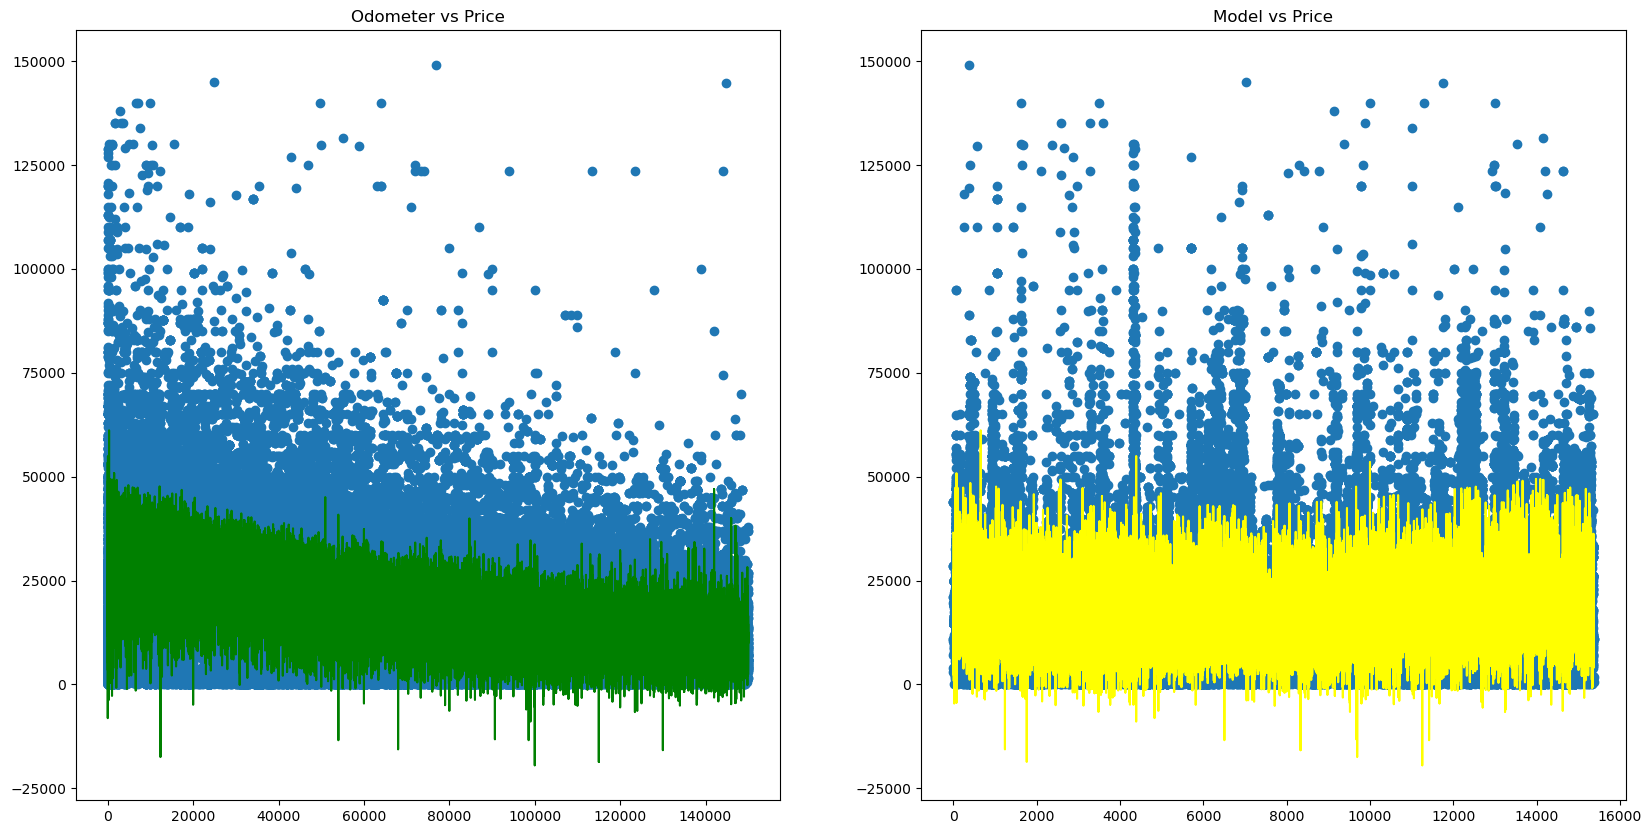

In [128]:
# At last, I checked the relationship of the 'price' with regard to ''odometer' and 'model' respectively using plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

ax1.scatter(data=used_car_final, x='odometer', y='price')

X_train_order = X_train.sort_values('odometer')
ax1.plot(X_train_order['odometer'], best_model.predict(X_train_order), color='green')
ax1.set_title('Odometer vs Price')

ax2.scatter(data=used_car_final, x='model', y='price')

X_train_order = X_train.sort_values('model')
ax2.plot(X_train_order['model'], best_model.predict(X_train_order), color='yellow')
ax2.set_title('Model vs Price')

fig.figure.savefig('images/used_car_p3.png')

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [93]:
# Deploymnet

# The price of used cars can be affected by many different factors. In this study, it was found that the top 5 
# features that influence the valuation of used vehicles most are 'year', 'odometer', 'size', 'transmission' 
# and 'condition'.

In [94]:
# Based on these findings, it is advised to the used car dealership to treat the age of the vehicle 
# and mileage on the vehicle as the most important consideration, followed by size of the vehicle, vehicle 
# transmission as well as the vehicle condition. 

In [95]:
# In addition to these, other factors could affect the used car price as well, with the supply and demand being 
# an critical one.